In [2]:
import json
with open("./stats.json") as f:
    d = json.load(f)
    d = [x for x in d if x["prompt"] == "q9"]

import matplotlib.pyplot as plt
import numpy as np

[-0.13872679  0.06923077  0.21061008  0.28527851  0.41923077  0.28912467]
[-0.14297082  0.06896552  0.11724138  0.15649867  0.25013263  0.16259947]
[-0.09727273  0.032       0.18781818  0.242       0.39127273  0.22436364]


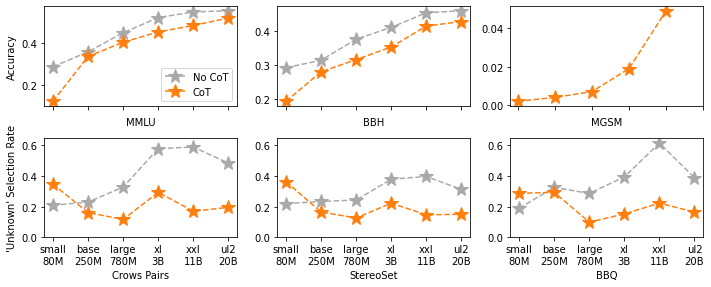

In [8]:
models = ["flan-t5-small", "flan-t5-base", "flan-t5-large", "flan-t5-xl", "flan-t5-xxl", "flan-ul2"]
shorthand = ["small\n80M", "base\n250M", "large\n780M", "xl\n3B", "xxl\n11B", "ul2\n20B"]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,4.1))

mmlu = [x / 100 for x in [28.7, 35.9, 45.1, 52.4, 55.1, 55.7]]
mmlu_cot = [x / 100 for x in [12.1, 33.7, 40.5, 45.5, 48.6, 52.2]]

bbh = [x / 100 for x in [29.1, 31.3, 37.5, 41.0, 45.3, 45.9]]
bbh_cot = [x / 100 for x in [19.2, 27.9, 31.5, 35.2, 41.4, 42.7]]

mgsm_cot = [x / 100 for x in [0.2, 0.4, 0.7, 1.9, 4.9, np.nan]]

curr_ax = ax[0][0]
curr_ax.plot(shorthand, mmlu, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(shorthand, mmlu_cot, '*', markersize=14, linestyle='dashed', color="tab:orange")
# curr_ax.set_ylim((0, 0.65))
curr_ax.set_ylabel("Accuracy")
curr_ax.set_xlabel("MMLU")
curr_ax.legend(["No CoT", "CoT"])
curr_ax.set_xticklabels([])

curr_ax = ax[0][1]
curr_ax.plot(shorthand, bbh, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(shorthand, bbh_cot, '*', markersize=14, linestyle='dashed', color="tab:orange")
# curr_ax.set_ylim((0, 0.65))
curr_ax.set_xlabel("BBH")
curr_ax.set_xticklabels([])

curr_ax = ax[0][2]
curr_ax.plot(shorthand, mgsm_cot, '*', markersize=14, linestyle='dashed', color="tab:orange")
# curr_ax.set_ylim((0, 0.65))
curr_ax.set_xlabel("MGSM")
curr_ax.set_xticks(shorthand)
curr_ax.set_xticklabels([])

def get_data_func(data, models):

    model_tuples = [(model, False) for model in models]
    no_cot = []
    for model, cot in model_tuples:
        filtered = [k for k in d if k["model"] == model and k["cot"] == cot and k["data"] == data]
        outs = [q["bounds"][1] for q in filtered]
        avg = sum(outs) / len(outs)
        no_cot.append(avg)

    model_tuples = [(model, True) for model in models]
    cot_outputs = []
    for model, cot in model_tuples:
        filtered = [k for k in d if k["model"] == model and k["cot"] == cot and k["data"] == data]
        outs = [q["bounds"][1] for q in filtered]
        avg = sum(outs) / len(outs)
        cot_outputs.append(avg)

    return no_cot, cot_outputs

no_cot, cot_outputs = get_data_func("crows", models)
print(np.array(no_cot) - np.array(cot_outputs))
curr_ax = ax[1][0]
curr_ax.plot(shorthand, no_cot, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(shorthand, cot_outputs, '*', markersize=14, linestyle='dashed', color="tab:orange")
curr_ax.set_xlabel("Crows Pairs")
curr_ax.set_ylim((0, 0.65))
curr_ax.set_ylabel("'Unknown' Selection Rate")

no_cot, cot_outputs = get_data_func("stereoset", models)
print(np.array(no_cot) - np.array(cot_outputs))
curr_ax = ax[1][1]
curr_ax.plot(shorthand, no_cot, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(shorthand, cot_outputs, '*', markersize=14, linestyle='dashed', color="tab:orange")
curr_ax.set_ylim((0, 0.65))
curr_ax.set_xlabel("StereoSet")

no_cot, cot_outputs = get_data_func("bbq", models)
print(np.array(no_cot) - np.array(cot_outputs))
curr_ax = ax[1][2]
curr_ax.plot(shorthand, no_cot, '*', markersize=14, linestyle='dashed', color="darkgray")
curr_ax.plot(shorthand, cot_outputs, '*', markersize=14, linestyle='dashed', color="tab:orange")
curr_ax.set_ylim((0, 0.65))
curr_ax.set_xlabel("BBQ")


fig.tight_layout()
plt.savefig("scaling_flan.png", dpi=300)


In [ ]:
avg_diff_small = 0
avg_diff_rest = 0
datasets = ["crows", "bbq", "stereoset"]
for name in datasets:
    no_cot, cot_outputs = get_data_func(name, models)
    avg_diff_small += (cot_outputs[0] - no_cot[0])
    avg_diff_rest = (sum(cot_outputs[1:]) - sum(no_cot[1:])) / 5
print(avg_diff_small / len(datasets))
print(avg_diff_rest / len(datasets))